Input Image (240, 240, 180)
Output Image torch.Size([240, 240, 180])


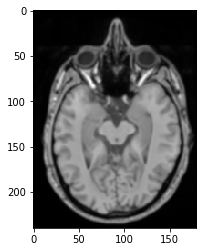

In [60]:
import torch
import nibabel as nib
import imageio
import matplotlib.pyplot as plt
import numpy
import glob
import os
import torch.nn as nn
from torch.utils.data.dataset import Dataset

# NIfTI Dataset
class NIfTIDataset(Dataset):
    
    def load_file_names(self):
        self.t1_files = sorted(glob.glob(os.path.join(self.t1_base_path, '*.nii.gz')))
        self.t2_files = sorted(glob.glob(os.path.join(self.t2_base_path, '*.nii.gz')))
    
    def __init__(self, t1_base_path, t2_base_path):
        self.t1_base_path = t1_base_path
        self.t2_base_path = t2_base_path
        self.load_file_names()
    
    def __getitem__(self, idx):
        self.dataset = (nib.load(self.t1_files[idx]).get_fdata(dtype=numpy.float32), nib.load(self.t2_files[idx]).get_fdata(dtype=numpy.float32))
        return self.dataset
    
    def __len__(self):
        return len(self.t1_files)

class NIfTIModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv3d(1, 3, kernel_size=3, padding=1)
    
    def forward(self, img):
        torch.transpose(torch.from_numpy(img), 0, 1)
        return conv(torch.transpose(torch.from_numpy(img), 0, 1).unsqueeze(0).unsqueeze(0))

nifti = NIfTIDataset("data/t1/", "data/t2/")
imgdata = nifti.__getitem__(0)
print("Input Image " + str(imgdata[0].shape))

mod = NIfTIModule()
imgout = mod.forward(imgdata[0])
print ("Output Image " + str(imgout[0][0].shape))

plt.imshow(imgout[0,0,130,:,:].detach().numpy(), cmap="gray")
